In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import datetime
import numpy as np
import gc

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
neurons = 512                 
activation_function = 'tanh'  
loss = 'mse'                  
optimizer= 'adam'             
dropout = 0.25                
batch_size = 128              
epochs = 50                  
window_len = 5
prediction_len = 5
train_split_size = 0.9          


exec(open("util.py").read())

In [3]:
google_data = pd.read_csv(filepath_or_buffer='GOOG.csv', encoding='utf8')

In [4]:
google_data.describe()

,Open,High,Low,Close,Volume
count,3512.000000,3512.000000,3512.000000,3512.000000,3.512000e+03
mean,420.051353,423.777245,416.040667,419.996487,7.676017e+06
std,271.915093,273.834551,270.030998,272.092191,8.292835e+06
min,49.274517,50.541279,47.669952,49.681866,7.900000e+03
25%,230.533100,232.846809,228.569626,230.595200,2.159775e+06
50%,300.830887,303.746918,298.073822,301.037048,4.928400e+06
75%,568.003174,572.311005,561.963745,566.936386,1.004360e+07
max,1271.000000,1273.890015,1249.020020,1268.329956,8.276810e+07


In [5]:
#google_data.drop(columns=['Date'], inplace=True)
google_data.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,9257400


In [6]:
model_data = create_model_data(google_data)

In [7]:
# split into train and test sets
train_size = int(len(model_data) * train_split_size)
test_size = len(model_data) - train_size
train, test = model_data.iloc[0:train_size,:], model_data.iloc[train_size:len(model_data),:]
print(len(train), len(test))

3160 352


In [8]:
train_set = train.drop('Date', 1)
test_set = test.drop('Date', 1)

In [9]:
X_train = create_inputs(train_set)
X_test = create_inputs(test_set)

In [10]:
Y_train = create_outputs(train_set)
Y_test = create_outputs(test_set)

In [11]:
X_train, X_test = to_array(X_train), to_array(X_test)

print (np.shape(X_train), 
       np.shape(X_test), 
       np.shape(Y_train), 
       np.shape(Y_test))

(3155, 5, 2) (347, 5, 2) (3155,) (347,)


In [12]:
#clean up the memory
gc.collect()
np.random.seed(202)

In [13]:
%%time
#build model
model = build_model(X_train, output_size=1, neurons=neurons)

# train model on data
model_history = model.fit(X_train, Y_train, 
                          epochs=epochs, 
                          batch_size=batch_size,
                          verbose=1, 
                          validation_data=(X_test, Y_test), 
                          shuffle=False)
clear_output()
print("done..." ,end=" ")

done... Wall time: 1min 39s


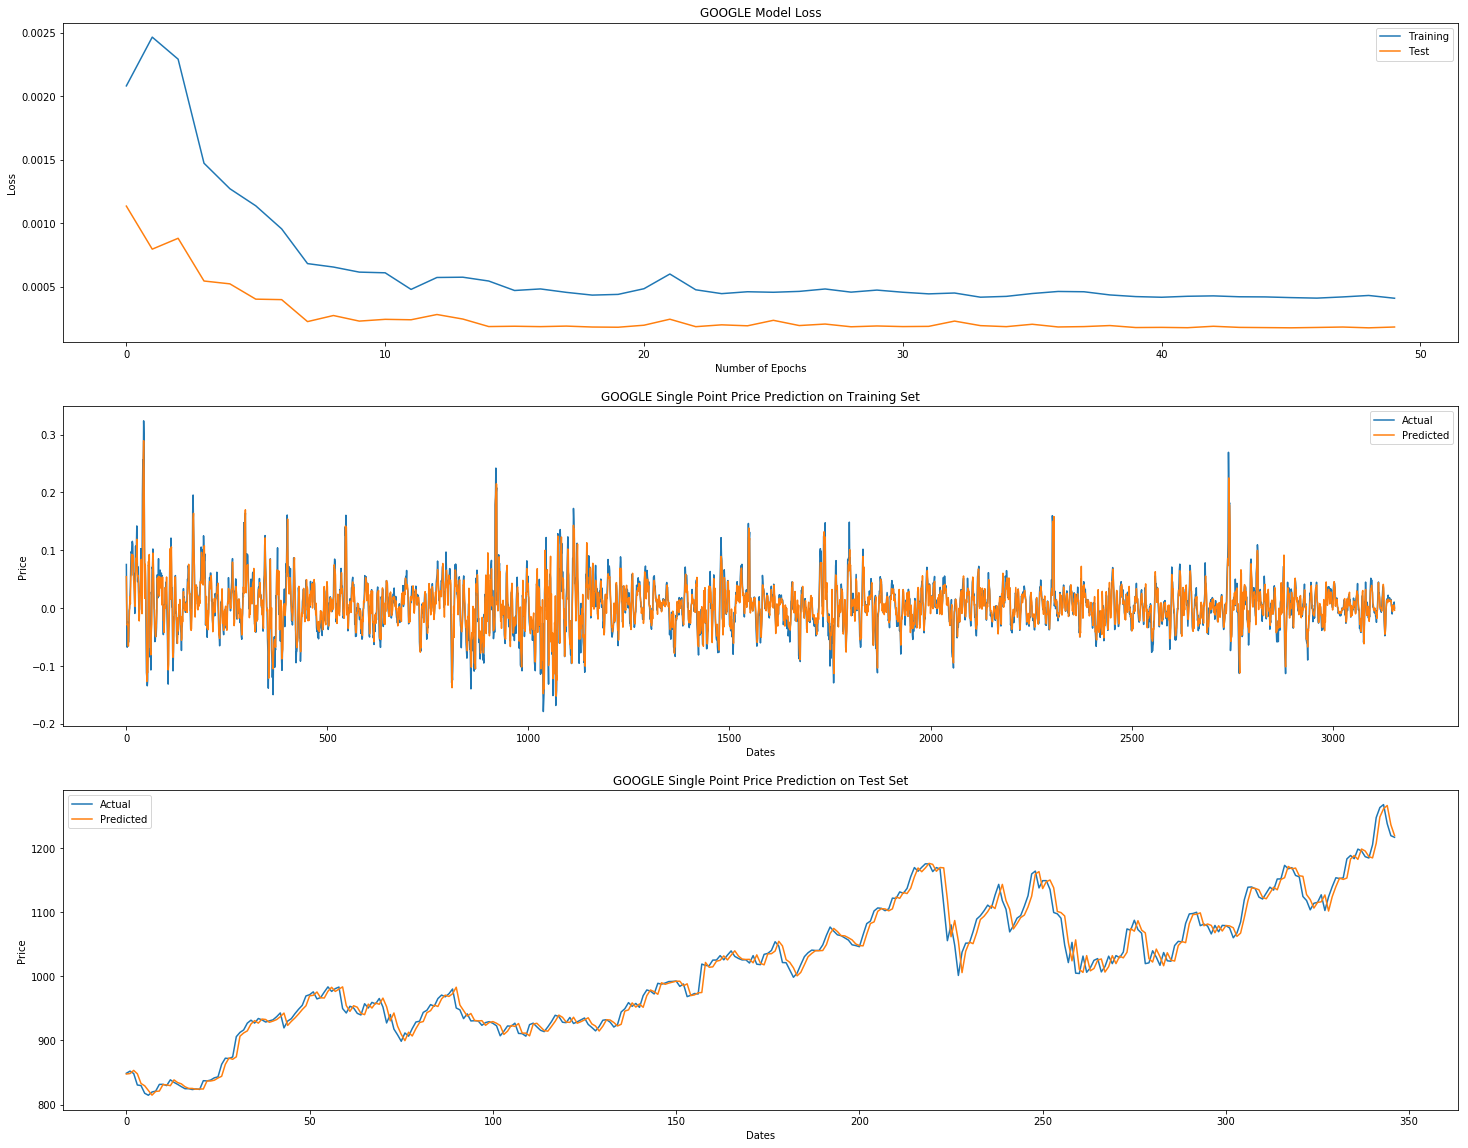

In [14]:
plot_results(model_history, model, Y_train, coin='GOOGLE')

In [15]:
predictions = predict_multiple(model=model, data=X_test, window_size=window_len, prediction_size=prediction_len)

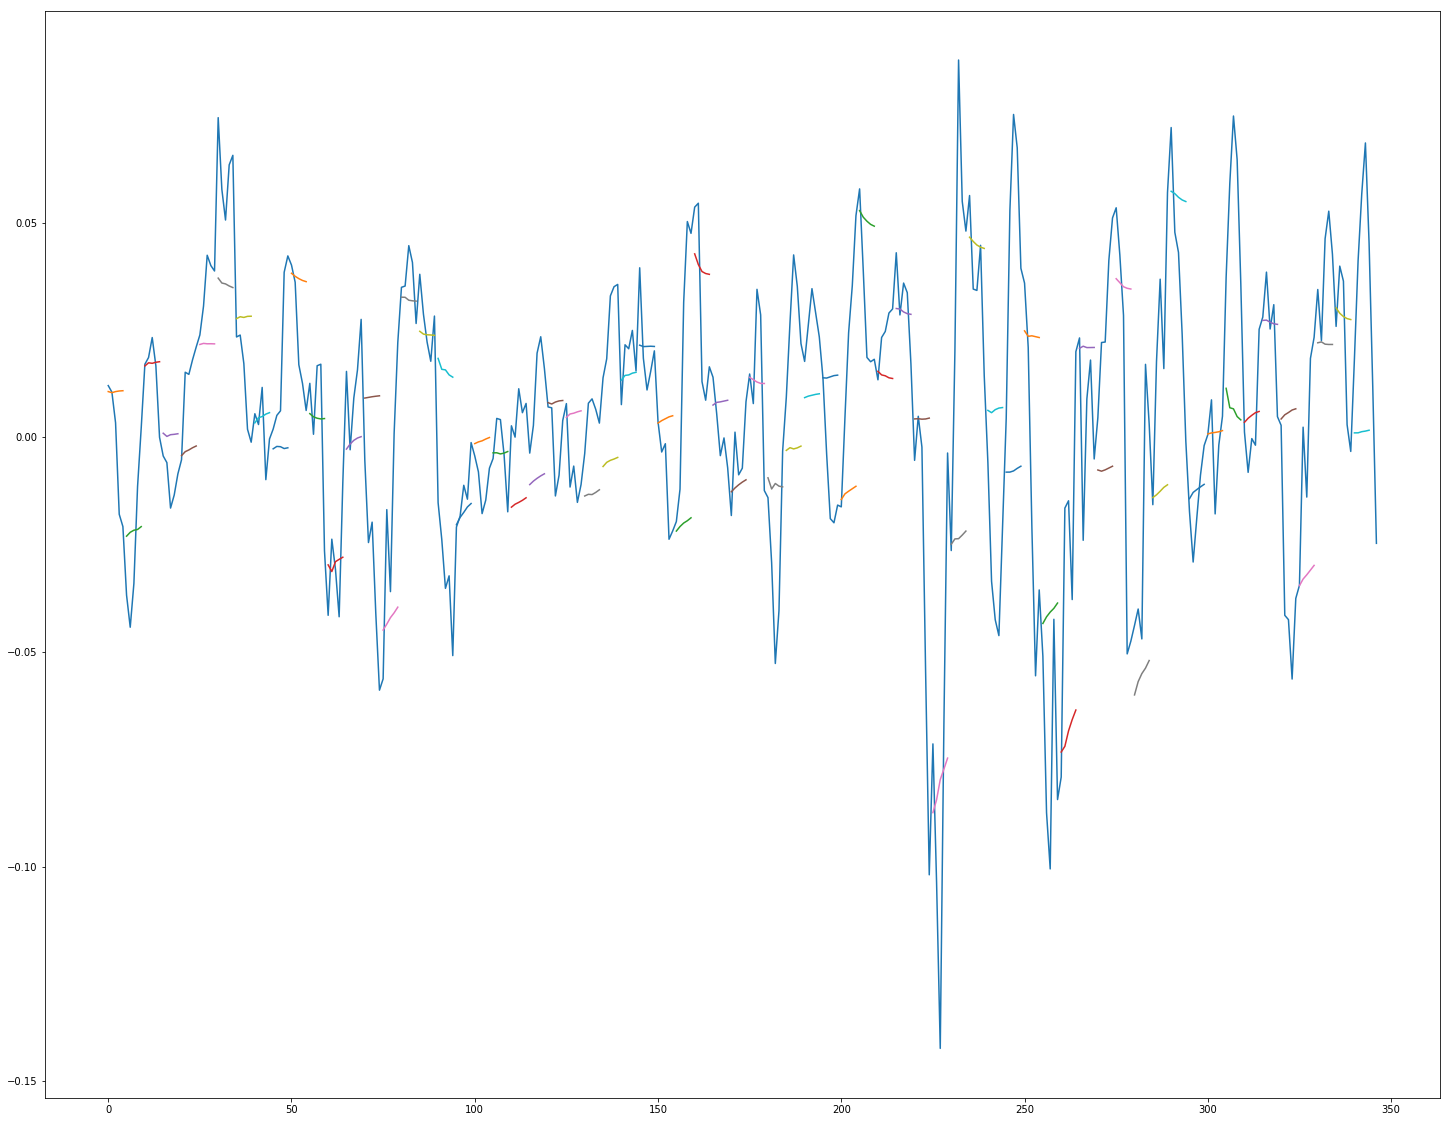

In [17]:
plot_multiple(predictions, Y_test, prediction_len)